In [1]:
# import the required packages
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [2]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [3]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [3]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
 # compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [4]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

In [5]:
trainX, trainY, testX, testY = load_dataset()

trainX, testX = prep_pixels(trainX, testX)




170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
# define model
model = define_model()

In [ ]:
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
	
# fit model
from numpy.random import seed
seed(123)

steps = int(trainX.shape[0] / 64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=400, validation_data=(testX, testY), verbose=1)


Epoch 1/400
  3/781 [..............................] - ETA: 23s - loss: 3.6043 - accuracy: 0.0990

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


781/781 [==============================] - 26s 33ms/step - loss: 2.1318 - accuracy: 0.2903 - val_loss: 1.5573 - val_accuracy: 0.4216
Epoch 2/400
781/781 [==============================] - 25s 32ms/step - loss: 1.6229 - accuracy: 0.4053 - val_loss: 1.5592 - val_accuracy: 0.4243
Epoch 3/400
781/781 [==============================] - 25s 32ms/step - loss: 1.5016 - accuracy: 0.4516 - val_loss: 1.5700 - val_accuracy: 0.4327
Epoch 4/400
781/781 [==============================] - 25s 32ms/step - loss: 1.4278 - accuracy: 0.4810 - val_loss: 1.4343 - val_accuracy: 0.4739
Epoch 5/400
781/781 [==============================] - 25s 32ms/step - loss: 1.3642 - accuracy: 0.5033 - val_loss: 1.5405 - val_accuracy: 0.4531
Epoch 6/400
781/781 [==============================] - 25s 32ms/step - loss: 1.3095 - accuracy: 0.5238 - val_loss: 1.3960 - val_accuracy: 0.4983
Epoch 7/400
781/781 [==============================] - 25s 32ms/step - loss: 1.2581 - accuracy: 0.5467 - val_loss: 1.3961 - val_accuracy: 0.50

In [10]:
model.save('vgg_model_basic.h5')

In [12]:
model.evaluate(testX, testY, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.3331 - accuracy: 0.8938


[0.33310312032699585, 0.8938000202178955]

In [14]:
# evaluate model
acc = model.evaluate(testX, testY, verbose=0)
# learning curves
summarize_diagnostics(history)

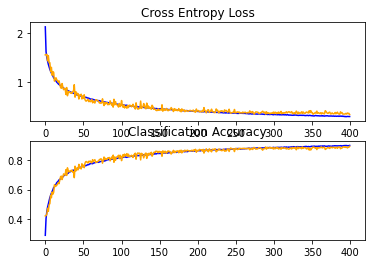

In [15]:
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')



In [22]:
# we'll be saving the model after every epoch if it's the best so far
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("best_model_VGG4.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max', save_freq='epoch')

In [23]:
def define_model_2():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.3))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.4))
  model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dropout(0.6))
  model.add(Dense(10, activation='softmax'))
  #compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model








In [24]:
trainX, trainY, testX, testY = load_dataset()

trainX, testX = prep_pixels(trainX, testX)

model = define_model_2()

In [25]:
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
	
# fit model
from numpy.random import seed
seed(123)

steps = int(trainX.shape[0] / 64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=400, validation_data=(testX, testY), verbose=1, callbacks = [checkpoint])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/400
781/781 [==============================] - 50s 62ms/step - loss: 2.8783 - accuracy: 0.1919 - val_loss: 1.6493 - val_accuracy: 0.3705

Epoch 00001: val_accuracy improved from -inf to 0.37050, saving model to best_model_VGG4.hdf5
Epoch 2/400
781/781 [==============================] - 48s 62ms/step - loss: 1.7722 - accuracy: 0.3377 - val_loss: 1.5195 - val_accuracy: 0.4279

Epoch 00002: val_accuracy improved from 0.37050 to 0.42790, saving model to best_model_VGG4.hdf5
Epoch 3/400
781/781 [==============================] - 48s 61ms/step - loss: 1.5993 - accuracy: 0.4012 - val_loss: 1.7471 - val_accuracy: 0.3828

Epoch 00003: val_accuracy did not improve from 0.42790
Epoch 4/400
781/781 [==============================] - 48s 62ms/step - loss: 1.5104 - accuracy: 0.4417 - val_loss: 1.5766 - val_accuracy: 0.4281

Epoch 00004: val_accuracy improved from 0.42790 to 0.42810, saving model to best_model_VGG4.hdf5
Epoch 5/400
781/781 [==============================] - 48s 62ms/step - lo

In [ ]:
# na testowym acc: 0.89860, dla VGG3: 0.8912

In [ ]:
# kolejny model: kazdy dropout zwiekszony o 0.1

In [26]:
def define_model3():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.6))
	model.add(Dense(10, activation='softmax'))
 # compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
model3 = define_model3()

checkpoint = ModelCheckpoint("best_model_VGG3_increased_dropout.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max', save_freq='epoch')
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
	
# fit model
from numpy.random import seed
seed(123)

steps = int(trainX.shape[0] / 64)
history = model3.fit_generator(it_train, steps_per_epoch=steps, epochs=400, validation_data=(testX, testY), verbose=1, callbacks = [checkpoint])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/400
781/781 [==============================] - 41s 51ms/step - loss: 2.7918 - accuracy: 0.2024 - val_loss: 1.6412 - val_accuracy: 0.3940

Epoch 00001: val_accuracy improved from -inf to 0.39400, saving model to best_model_VGG3_increased_dropout.hdf5
Epoch 2/400
781/781 [==============================] - 42s 54ms/step - loss: 1.7575 - accuracy: 0.3568 - val_loss: 1.5398 - val_accuracy: 0.4224

Epoch 00002: val_accuracy improved from 0.39400 to 0.42240, saving model to best_model_VGG3_increased_dropout.hdf5
Epoch 3/400
781/781 [==============================] - 42s 54ms/step - loss: 1.6074 - accuracy: 0.4032 - val_loss: 1.6112 - val_accuracy: 0.4087

Epoch 00003: val_accuracy did not improve from 0.42240
Epoch 4/400
781/781 [==============================] - 42s 54ms/step - loss: 1.5173 - accuracy: 0.4447 - val_loss: 1.6558 - val_accuracy: 0.3934

Epoch 00004: val_accuracy did not improve from 0.42240
Epoch 5/400
781/781 [==============================] - 41s 53ms/step - loss: 1.

In [ ]:
# moze do przetestowania wziac VGG 1 i np dodac rozne augmentacje danych i sprawdzac, jak sie poprawia, a potem te
# augmentacje zastosowac na glebszej sieci